In [48]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [49]:
#como generar una perturbacion para generar los datos sinteticos

In [50]:
N = 100
rng =  0.5 * (2 * np.random.random(N) - 1)

In [51]:
x = np.linspace(0,10,N)
b = 2
y = 2.1 * x + b + rng

Text(0.5, 1.0, 'Dispersion de Datos')

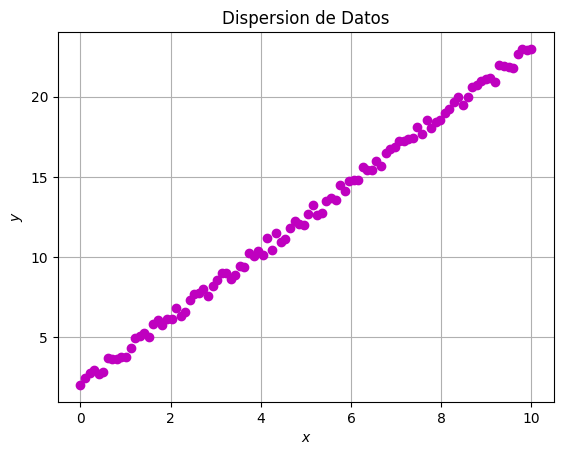

In [52]:
plt.plot(x, y, 'mo')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Dispersion de Datos')

In [53]:
#Como hacele el fit a estos datos

In [54]:
 #Funcion que optimiza los datos por regresion lineal
 
 #optimize.curve_fit?

In [55]:
def fun(x, a, b):

  return a * x +b

In [56]:
params_fit = curve_fit(fun,x,y)

In [57]:
x_ = np.linspace(min(x), max(x), 1000)

val = fun(x_, *params_fit[0])

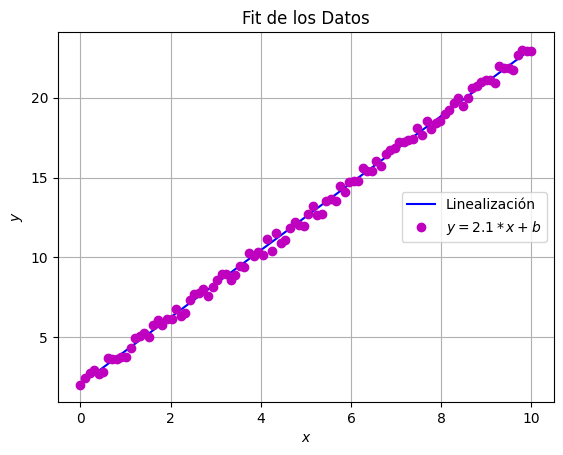

In [58]:
plt.plot(x_, val, 'b', label = 'Linealización')
plt.plot(x, y, 'mo', label = '$y = 2.1 * x + b$')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Fit de los Datos')
plt.legend(loc = 5)

In [59]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT1on46nfXC-sPxOXOPO-OXCDIFOdmJWhn_WLEMFDX8REAmfrkT3XwFNuaYxk4gz2FE1KEJo2oHrUyG/pub?output=csv'
df = pd.read_csv(url, sep = ';', decimal = '.')
df = df.rename(columns = {'Tiempo (ms)':'Tiempo [ms]', 'Ángulo 1,':'AnguloDeg'})
df.AnguloDeg = df.AnguloDeg.str.replace(',', '.').astype(float)
df['AnguloRad'] = np.deg2rad(df.AnguloDeg)
df['Tiempo [s]'] = df['Tiempo [ms]'] / 1000

In [60]:
df

,Tiempo [ms],AnguloDeg,AnguloRad,Tiempo [s]
0,9,59.289612,1.034799,0.009
1,42,59.982327,1.046889,0.042
2,75,61.237453,1.068795,0.075
3,108,63.492477,1.108153,0.108
4,142,65.388771,1.141249,0.142
...,...,...,...,...
2842,94709,94.937576,1.656973,94.709
2843,94743,96.479851,1.683891,94.743
2844,94776,97.940689,1.709387,94.776
2845,94809,99.318092,1.733428,94.809


In [61]:
tiempo = df['Tiempo [s]']
angu = df['AnguloRad']

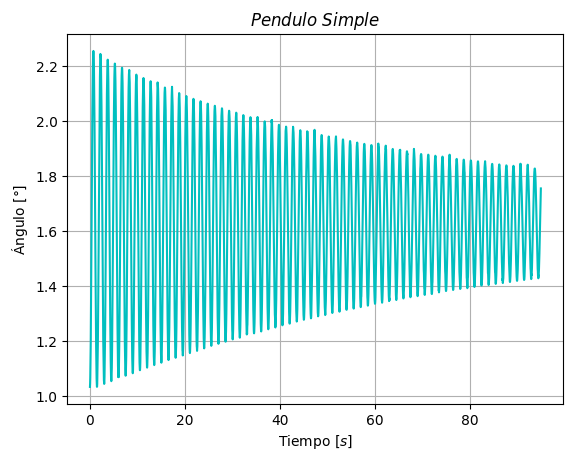

In [62]:
plt.plot(tiempo,angu, 'c')
plt.xlabel('Tiempo [$s$]')
plt.ylabel('Ángulo [$°$]')
plt.title('$Pendulo$ $Simple$')
plt.grid()

In [63]:
def fun_(t, A, alpha, w, phi, cte):

  return A * np.exp(-alpha * t) * np.cos(w * t + phi) + cte

In [77]:
N = 100000

t = 500000* np.random.random(N)

params = 2,1,0

In [78]:
vec = curve_fit(fun_,tiempo,angu)
vec

(array([-0.61320999,  0.01261673,  4.19498073, -0.16574795,  1.63193062]),
 array([[ 5.79232322e-06, -1.92006132e-07,  1.73190792e-09,
         -7.90227554e-08,  9.68379975e-10],
        [-1.92006132e-07,  1.04228248e-08, -6.76388210e-11,
          2.83742979e-09, -1.99735148e-10],
        [ 1.73190792e-09, -6.76388210e-11,  1.04361660e-08,
         -3.14606244e-07,  3.66833751e-10],
        [-7.90227554e-08,  2.83742979e-09, -3.14606244e-07,
          1.54947541e-05, -2.11267024e-08],
        [ 9.68379975e-10, -1.99735148e-10,  3.66833751e-10,
         -2.11267024e-08,  4.28632130e-07]]))

In [79]:
a = vec[0][0]
b = vec[0][1]
c = vec[0][2]

a,b,c

(-0.6132099890481985, 0.012616734220200473, 4.1949807315757965)

In [80]:
x_ = np.linspace(min(tiempo), max(tiempo), 10000)

val = fun_(x_, *vec[0])

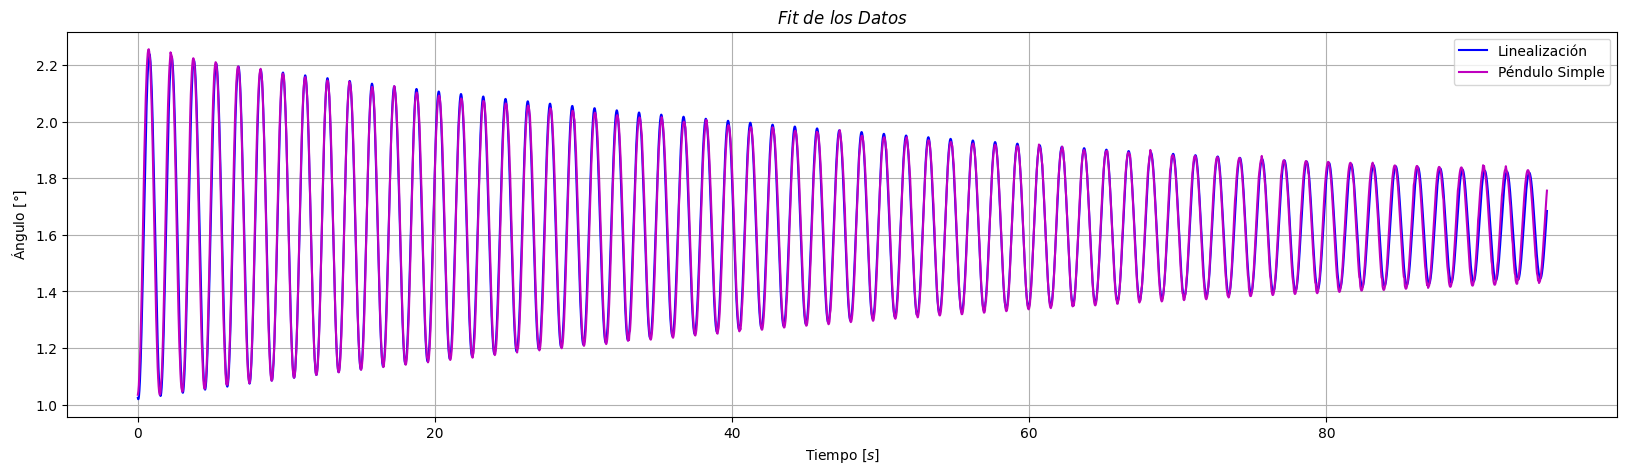

In [81]:
plt.figure(figsize =(20,5))
plt.plot(x_, val, 'b', label = 'Linealización')
plt.plot(tiempo, angu, 'm', label = 'Péndulo Simple')
plt.grid()
plt.xlabel('Tiempo [$s$]')
plt.ylabel('Ángulo [$°$]')
plt.title('$Fit$ $de$ $los$ $Datos$')
plt.legend()